In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
import os
print(os.getcwd())

/Users/priyanka/Desktop/emotion


In [3]:
TRAIN_DIR = 'image copy/train'
TEST_DIR = 'image copy/test'


In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        label_path = os.path.join(dir, label)
        if os.path.isdir(label_path):  # Ensure it's a directory
            for imagename in os.listdir(label_path):
                # Skip system files like .DS_Store
                if not imagename.startswith('.'):
                    image_paths.append(os.path.join(label_path, imagename))
                    labels.append(label)
            print(label, "completed")
    return image_paths, labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)


happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [6]:
print(train)

                                                image    label
0        image copy/train/happy/Training_50449107.jpg    happy
1        image copy/train/happy/Training_70433018.jpg    happy
2        image copy/train/happy/Training_85610005.jpg    happy
3         image copy/train/happy/Training_4460748.jpg    happy
4         image copy/train/happy/Training_6312930.jpg    happy
...                                               ...      ...
28704  image copy/train/disgust/Training_94788538.jpg  disgust
28705  image copy/train/disgust/Training_81049148.jpg  disgust
28706  image copy/train/disgust/Training_28365203.jpg  disgust
28707  image copy/train/disgust/Training_39197750.jpg  disgust
28708  image copy/train/disgust/Training_12525818.jpg  disgust

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [8]:
print(test)

                                                image
0        image copy/train/happy/Training_50449107.jpg
1        image copy/train/happy/Training_70433018.jpg
2        image copy/train/happy/Training_85610005.jpg
3         image copy/train/happy/Training_4460748.jpg
4         image copy/train/happy/Training_6312930.jpg
...                                               ...
28704  image copy/train/disgust/Training_94788538.jpg
28705  image copy/train/disgust/Training_81049148.jpg
28706  image copy/train/disgust/Training_28365203.jpg
28707  image copy/train/disgust/Training_39197750.jpg
28708  image copy/train/disgust/Training_12525818.jpg

[28709 rows x 1 columns]


In [9]:
print(test['image'])

0          image copy/train/happy/Training_50449107.jpg
1          image copy/train/happy/Training_70433018.jpg
2          image copy/train/happy/Training_85610005.jpg
3           image copy/train/happy/Training_4460748.jpg
4           image copy/train/happy/Training_6312930.jpg
                              ...                      
28704    image copy/train/disgust/Training_94788538.jpg
28705    image copy/train/disgust/Training_81049148.jpg
28706    image copy/train/disgust/Training_28365203.jpg
28707    image copy/train/disgust/Training_39197750.jpg
28708    image copy/train/disgust/Training_12525818.jpg
Name: image, Length: 28709, dtype: object


In [10]:
from tqdm.notebook import tqdm

In [11]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')  # Corrected argument here
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [12]:
train_features = extract_features(train['image'])

100%|███████████████████████████████████| 28709/28709 [00:04<00:00, 5867.73it/s]


In [13]:
test_features = extract_features(test['image'])

100%|███████████████████████████████████| 28709/28709 [00:04<00:00, 6572.12it/s]


In [14]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(train['label'])

In [18]:
print(test.columns)

Index(['image'], dtype='object')


In [19]:
from tensorflow.keras.utils import to_categorical


In [20]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [21]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

/Users/priyanka/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test)) 

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.2426 - loss: 1.8384 - val_accuracy: 0.2572 - val_loss: 1.7921
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.2532 - loss: 1.7950 - val_accuracy: 0.3023 - val_loss: 1.7186
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.3029 - loss: 1.7151 - val_accuracy: 0.4024 - val_loss: 1.5328
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 311s 1s/step - accuracy: 0.3858 - loss: 1.5734 - val_accuracy: 0.4452 - val_loss: 1.4263
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.4212 - loss: 1.4854 - val_accuracy: 0.4884 - val_loss: 1.3351
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.4473 - loss: 1.4248 - val_accuracy: 0.5076 - val_loss: 1.2767
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.4655 - loss: 1.3874 - val_accuracy: 0.5333 - val_loss: 1.2200
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.4829 - loss: 1.3452 - 

225/225 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.6384 - loss: 0.9607 - val_accuracy: 0.7705 - val_loss: 0.6682
Epoch 51/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.6418 - loss: 0.9560 - val_accuracy: 0.7794 - val_loss: 0.6479
Epoch 52/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - accuracy: 0.6440 - loss: 0.9579 - val_accuracy: 0.7859 - val_loss: 0.6462
Epoch 53/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.6468 - loss: 0.9430 - val_accuracy: 0.7840 - val_loss: 0.6527
Epoch 54/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 301s 1s/step - accuracy: 0.6513 - loss: 0.9424 - val_accuracy: 0.7912 - val_loss: 0.6451
Epoch 55/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.6516 - loss: 0.9321 - val_accuracy: 0.8040 - val_loss: 0.6175
Epoch 56/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.6558 - loss: 0.9315 - val_accuracy: 0.7969 - val_loss: 0.6376
Epoch 57/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.6512 - loss: 0.9279 - val_a

225/225 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.7319 - loss: 0.7432 - val_accuracy: 0.9083 - val_loss: 0.3562
Epoch 100/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.7278 - loss: 0.7470 - val_accuracy: 0.9059 - val_loss: 0.3870


In [24]:
print(x_train.shape)  # Should be (num_samples, height, width, channels)
print(y_train.shape)  # Should be (num_samples, num_classes)


(28709, 48, 48, 1)
(28709, 7)


In [25]:
model_json = model.to_json()
with open("emotiondetector.json",'w')as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [26]:
from keras.models import model_from_json
from tensorflow.keras.models import model_from_json, Sequential

In [27]:
json_file = open("emotiondetector.json","r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [28]:
import os
print(os.path.exists('model.json'))  # Should return True if the file is in the correct location


False


In [29]:
label = ['angry','disgust','fear','happy','sad','suprise']

In [34]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

def ef(image):
    # Load the image in grayscale mode
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)  # Ensure the dimensions are correct
    return feature



In [35]:
image = '/Users/priyanka/Desktop/emotion/image copy/train/angry/Training_233976.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
model prediction is  angry


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline 

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  suprise


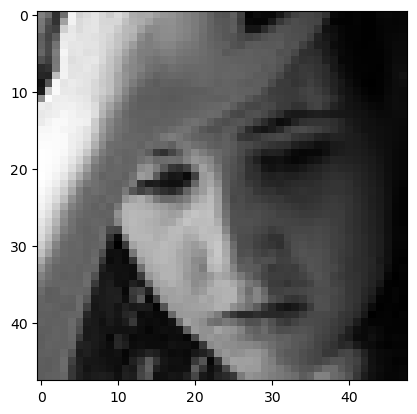

In [37]:
image = '/Users/priyanka/Desktop/emotion/image copy/train/sad/Training_175734.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
model prediction is  fear


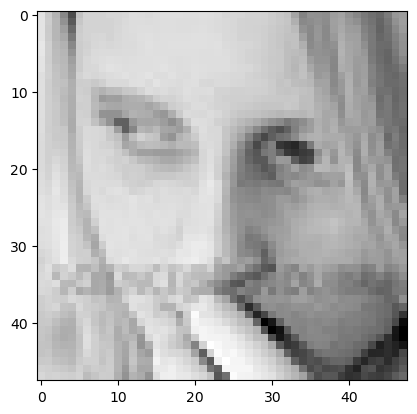

In [38]:
image = '/Users/priyanka/Desktop/emotion/image copy/train/fear/Training_341092.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
model prediction is  disgust


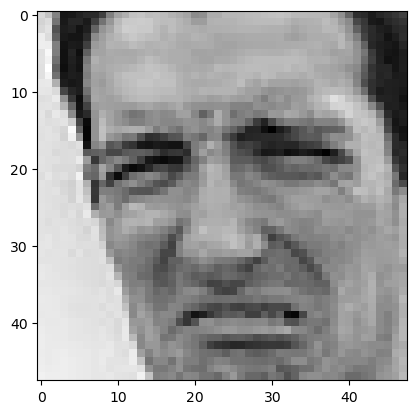

In [39]:
image = '/Users/priyanka/Desktop/emotion/image copy/train/disgust/Training_5420780.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
model prediction is  happy


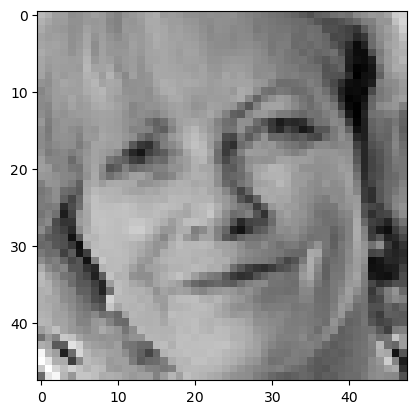

In [40]:
image = '/Users/priyanka/Desktop/emotion/image copy/train/happy/Training_143503.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
model prediction is  happy


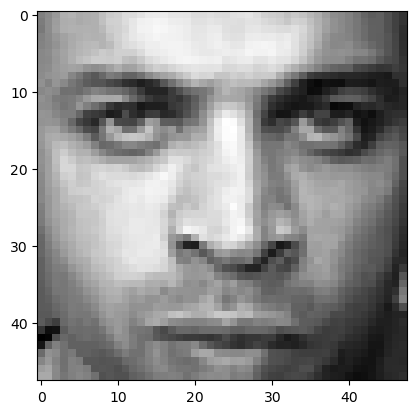

In [42]:
image = '/Users/priyanka/Desktop/emotion/image copy/train/neutral/Training_221103.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')